# OvR and OvO

## OvR(One vs Rest)

思想：n 种类型的样本进行分类时，分别取一种样本作为一类，将剩余的所有类型的样本看做另一类，这样就形成了 n 个二分类问题，使用逻辑回归算法对 n 个数据集训练出 n 个模型，将待预测的样本传入这 n 个模型中，所得概率最高的那个模型对应的样本类型即认为是该预测样本的类型；

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
# [:, :2]：所有行，0、1 列，不包含 2 列；
X = iris.data[:,:2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [5]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


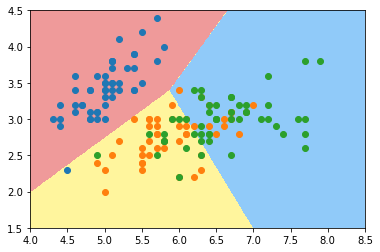

In [7]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## OvO（One vs One)

思想： n 类样本中，每次挑出 2 种类型，两两结合，一共有 $C_n^2$ 种二分类情况，使用 $C_n^2$ 种模型预测样本类型，有 $C_n^2$ 个预测结果，种类最多的那种样本类型，就认为是该样本最终的预测类型；

1.C=1.0：正则化的超参数，默认为 1.0；

2.multi_class='ovr'：scikit-learn中的逻辑回归默认支持多分类问题，分类方式为 'OvR'；

3.solver='liblinear'、'lbfgs'、'sag'、'newton-cg'：scikit-learn中优化损失函数的方法，不是梯度下降法；

4.多分类中使用 multinomial （OvO）时，只能使用 'lbfgs'、'sag'、'newton-cg' 来优化损失函数；

5.当损失函数使用了 L2 正则项时，优化方法只能使用 'lbfgs'、'sag'、'newton-cg'；

6.使用 'liblinear' 优化损失函数时，正则项可以为 L1 和 L2 ；

In [8]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# 'multinomial'：指 OvO 方法；

In [9]:
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


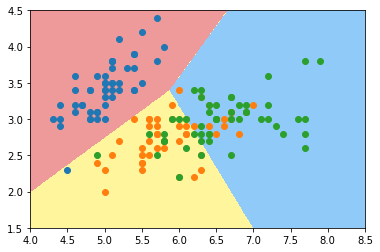

In [10]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()


### Use total data

In [11]:
X = iris.data
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

#### OvR

In [13]:
log_reg_ovr = LogisticRegression(multi_class='ovr')
log_reg_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [14]:
log_reg_ovr.score(X_test, y_test)

0.9736842105263158

#### OvO

In [15]:
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg_ovo.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [16]:
log_reg_ovo.score(X_test, y_test)

1.0

## Packaging OvR and OvO

##### OvR

In [17]:
from sklearn.multiclass import OneVsRestClassifier

In [18]:
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

##### OvO

In [19]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0